In [1]:
import tensorflow.compat.v1 as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.1.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 5s 1us/step


In [7]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
len(test_labels)

10000

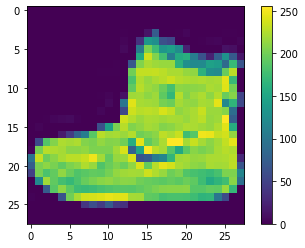

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_images = train_images/255.0
test_images = test_images/255.0

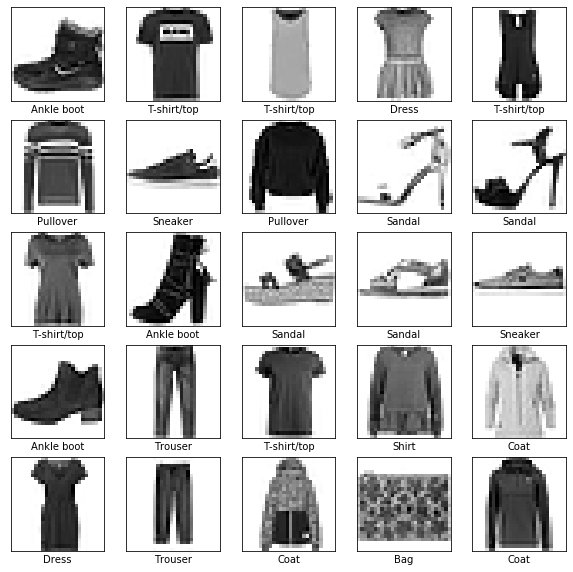

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [19]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

In [20]:
model.fit(train_images,train_labels,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 168us/sample - loss: 0.5030 - accuracy: 0.8243
Epoch 2/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.3795 - accuracy: 0.8639
Epoch 3/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.3383 - accuracy: 0.8782
Epoch 4/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3134 - accuracy: 0.8844
Epoch 5/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2962 - accuracy: 0.8910
Epoch 6/10
60000/60000 [==============================] - 7s 108us/sample - loss: 0.2810 - accuracy: 0.8961
Epoch 7/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2685 - accuracy: 0.8995
Epoch 8/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2580 - accuracy: 0.9045
Epoch 9/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2482 - accuracy: 0.9069
Epoch 10/1

In [21]:
test_loss,test_acc = model.evaluate(test_images,test_labels)

print('Test accuracy',test_acc)

10000/10000 [==============================] - 1s 97us/sample - loss: 0.3361 - accuracy: 0.8843
Test accuracy 0.8843


In [22]:
predictions = model.predict(test_images)

In [23]:
predictions[0]

array([1.2297140e-06, 6.5907740e-10, 2.7566607e-10, 1.4250497e-11,
       6.4276151e-08, 3.6571883e-03, 2.7506144e-07, 1.3479769e-02,
       4.4384201e-06, 9.8285705e-01], dtype=float32)

In [24]:
np.argmax(predictions[0])

9

In [25]:
test_labels[0]

9

In [26]:
def plot_image(i,predictions_array,true_label,img):
    predictions_array,true_label,img = predictions[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img,cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color
                                        )
def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label = predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot= plt.bar(range(10),predictions_array,color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')


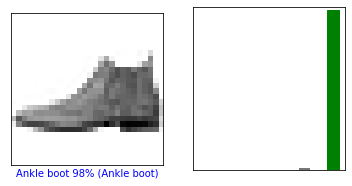

In [27]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

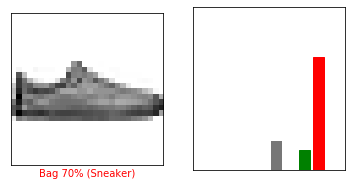

In [29]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

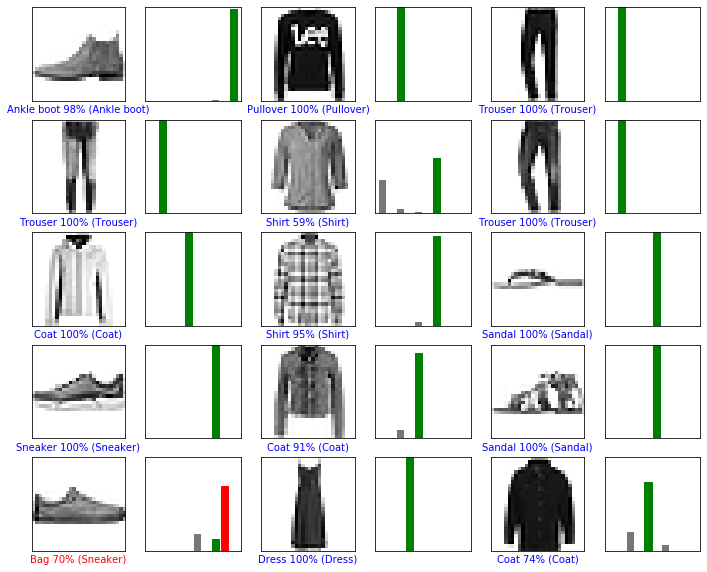

In [30]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions,test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions,test_labels)
plt.show()

In [31]:
img = test_images[0]
print(img.shape)

(28, 28)


In [32]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [33]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.22971744e-06 6.59078625e-10 2.75666601e-10 1.42505235e-11
  6.42762714e-08 3.65719874e-03 2.75061979e-07 1.34797813e-02
  4.43843737e-06 9.82857049e-01]]


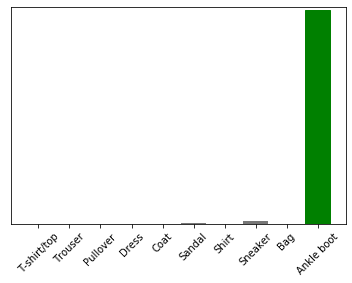

In [34]:
plot_value_array(0,predictions_single,test_labels)
_ = plt.xticks(range(10),class_names,rotation=45)

In [35]:
np.argmax(predictions_single[0])

9